In [1]:
import numpy as np
import pandas as pd
from sklearn import cluster
from sklearn import metrics

from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
numericalDF = pd.read_csv('numericalData.csv')
columnas = ['directores','criticas','duracion','genero','actores1','actores2','actores3','rostros',
            'scores','gross','budget']
del numericalDF['Unnamed: 0']
del numericalDF['gross']
del numericalDF['budget']
for i in columnas[0:-2]:
    numericalDF.loc[numericalDF[i] == 0, i] = numericalDF[i].mean()
X = numericalDF.head(20)
numericalDF.head(100)

,directores,criticas,duracion,genero,actores1,actores2,actores3,rostros,scores
0,0.024778,0.003295,0.011543,0.007769,0.034020,0.029215,0.027567,0.007924,0.014223
1,0.031655,0.001073,0.012825,0.011654,0.015347,0.000761,0.027559,0.028946,0.013576
2,0.031642,0.000996,0.009747,0.018128,0.034004,0.029206,0.027551,0.007924,0.013576
3,0.001505,0.003295,0.005515,0.022013,0.033988,0.029196,0.027543,0.005789,0.016162
4,0.031629,0.000077,0.011158,0.011654,0.024448,0.029186,0.006778,0.011579,0.016593
5,0.022877,0.001073,0.012184,0.011654,0.033971,0.029177,0.027536,0.005789,0.013792
6,0.031616,0.010607,0.010773,0.022013,0.033955,0.029167,0.027528,0.007924,0.016809
7,0.005597,0.004291,0.010389,0.001295,0.033939,0.029158,0.027520,0.007924,0.014869
8,0.031603,0.002682,0.010260,0.006474,0.033923,0.029148,0.027512,0.007924,0.013576
9,0.031589,0.010957,0.009876,0.018128,0.033907,0.029138,0.027504,0.007924,0.015085


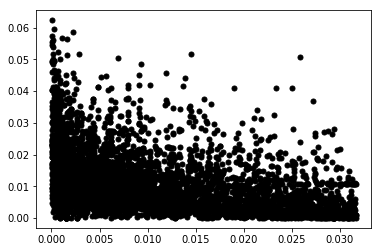

In [3]:
multishapes = numericalDF.values
plt.plot(multishapes[:, 0], multishapes[:, 1], 'o', 
         markeredgecolor='0', markerfacecolor='0', markersize=5)
plt.show()

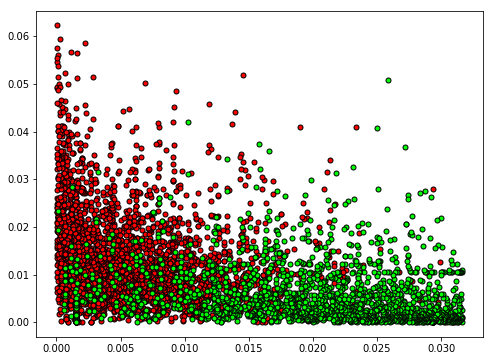

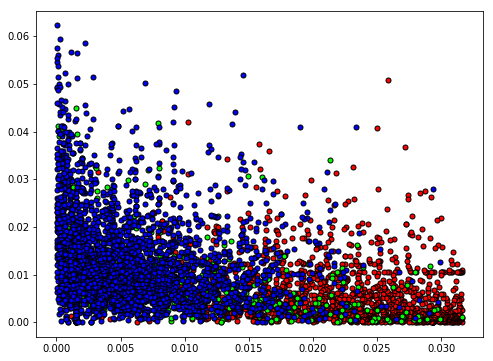

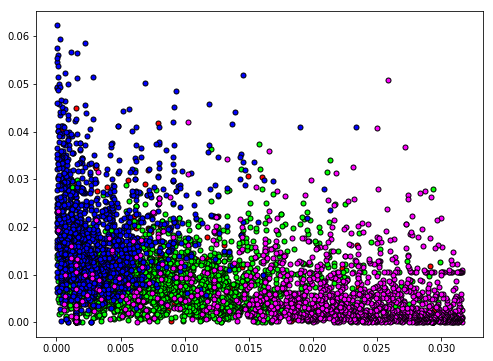

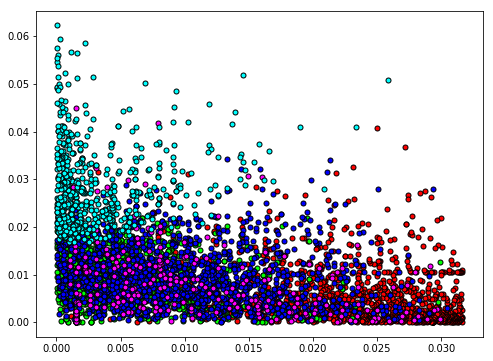

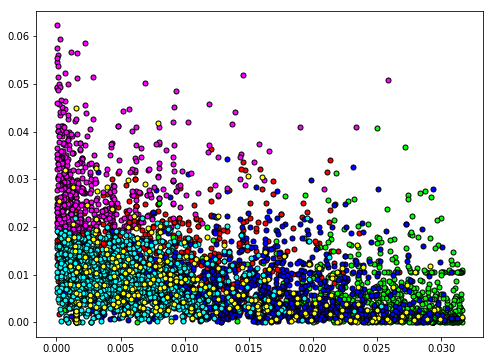

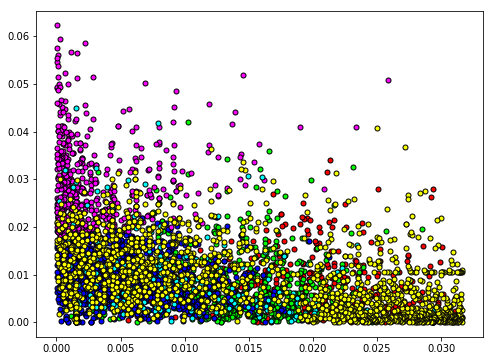

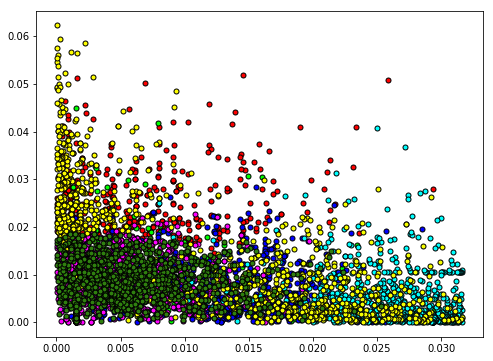

In [6]:
# num_clusters = 3
for i in range(2,9):
    num_clusters = i
    k_means = cluster.KMeans(n_clusters=num_clusters, init='random')
    k_means.fit(multishapes)

    fig = plt.figure(figsize=(8, 6))
    colors = ['#ff0000', '#00ff00', '#0000ff', '#ff00ff', '#00ffff', '#ffff00', '#f6ff00', 
              '#2f800f', '#a221b5', '#21b5ac', '#b1216c']
    for k in range(num_clusters):
        my_members = k_means.labels_ == k
        plt.plot(multishapes[my_members, 0], multishapes[my_members, 1], 'o', 
                 markeredgecolor='k', markerfacecolor=colors[k], markersize=5)

{0}


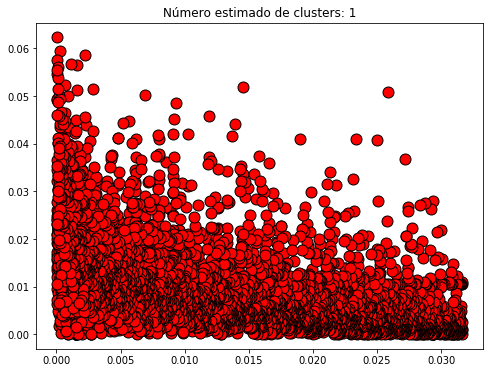

In [13]:
db = cluster.DBSCAN(eps=0.3, min_samples=10)
db.fit(multishapes)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

unique_labels = set(db.labels_)
print(unique_labels)

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(unique_labels) - (1 if -1 in db.labels_ else 0)
fig = plt.figure(figsize=(8, 6))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'
    my_members = db.labels_ == k

    xy = multishapes[my_members & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', 
             markerfacecolor=col, markeredgecolor='k', markersize=11)

    xy = multishapes[my_members & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', 
             markerfacecolor=col, markeredgecolor='k', markersize=6)
    
plt.title('Número estimado de clusters: %d' % n_clusters_)
plt.show()